In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Zad
Wygeneruj dane z rozkładu N(m,\Sigma)
gdzie
$$
m = [0,0,0]
$$
oraz 
$$
\Sigma = 
\begin{bmatrix}
    1 & 0.999 & 0\\
    0.999 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

Narysuj wykresy 
* pairplot
* heatmapę korelacji 

In [3]:
X = np.random.multivariate_normal([0,0,0],np.array([[1,0.999,0],[0.999,1,0],[0,0,1]]),20)
print(X)

[[ 0.5432344   0.55452555 -1.27968238]
 [ 0.88849288  0.83455671 -0.57154043]
 [ 1.40689713  1.39402541  0.18698942]
 [ 0.82558798  0.86454267  0.50589683]
 [ 0.45210529  0.48453578 -1.20782555]
 [ 0.86449666  0.88353781  1.0540069 ]
 [-0.36845969 -0.35002816 -0.93621082]
 [ 1.128108    1.11579486 -0.60034126]
 [-0.19305326 -0.24728143 -1.21279525]
 [-1.03129525 -1.00512783 -1.10342651]
 [ 0.09718895  0.0914624   0.15371985]
 [-0.40402862 -0.334006   -1.27490284]
 [ 1.54783158  1.52088348  1.13328006]
 [ 0.40353493  0.45818453 -1.35135841]
 [-1.06313361 -1.04877821 -1.87500068]
 [-0.09197932 -0.12166384 -3.34056512]
 [-0.43018361 -0.43405532  0.16078305]
 [-0.71891786 -0.61359567  1.24446306]
 [-0.36123558 -0.40775178  0.1838974 ]
 [-1.15348513 -1.14564642 -0.64856314]]


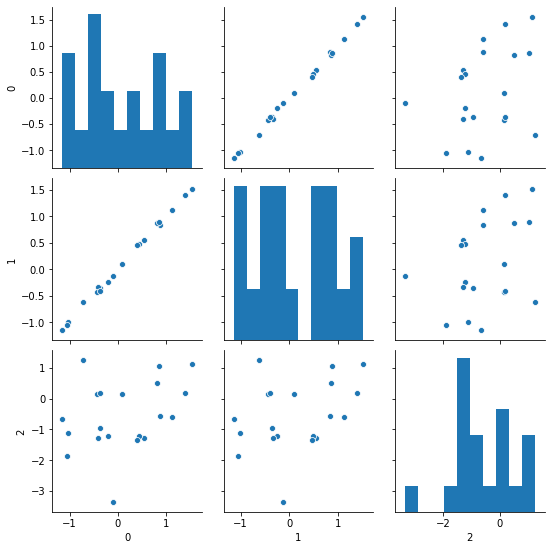

In [4]:
df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()

## Czyli mamy dwie bardzo silnie skorelowane zmienne

# Zad
Proszę wykonać rozkład SVD za pomocą
```python
    np.linalg.svd()
```

In [4]:
U, s, V = np.linalg.svd(X, full_matrices=True)

print("U:\n", U)
S = np.zeros((X.shape[0], X.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:X.shape[1], :X.shape[1]] = np.diag(s)
print("S\n", S)
print("V^T:\n", V)

U:
 [[-3.33246226e-01  1.32095668e-01  2.78971070e-02  1.93788404e-01
   4.85077386e-01  1.14466635e-01 -1.70886555e-01  1.52110794e-01
   1.23394256e-01  8.70513027e-02 -2.05519121e-01  1.81203259e-01
  -2.96861771e-02  1.23423934e-01  3.72411928e-01 -7.20915414e-02
  -4.05967075e-01 -1.84388563e-01 -1.50025921e-01  2.30710523e-01]
 [ 2.56150079e-01  1.78115440e-01  2.13698206e-01 -8.50974511e-02
   1.62261865e-01  3.45855642e-01  2.02545137e-01 -3.30461176e-01
  -3.76006984e-01 -4.89300346e-02  3.72226987e-01 -4.65234936e-02
   2.21041975e-01 -8.28774329e-02  4.30602563e-01 -3.38852273e-02
  -2.34571958e-02  8.33490068e-02 -1.19091671e-01  7.14946189e-02]
 [-2.56563243e-01  9.63565332e-02  7.49137448e-02  4.00258497e-01
  -1.27990229e-01  3.68386138e-02  1.18138672e-01 -3.11455089e-02
   3.51563090e-02 -1.39477505e-01  1.58581746e-01  1.93510025e-01
   3.20551546e-01 -2.19180090e-01 -2.49007319e-01  4.45533054e-01
  -1.73391530e-01 -1.13201148e-02 -3.74818323e-01 -2.47271271e-01]
 [ 

# Zad
wypisz macierz S

In [5]:
S   #   Widzimy, że trzeci wymiar nie niesie dużo informacji (wzgledem wczesniejszych)

array([[6.15776896, 0.        , 0.        ],
       [0.        , 4.77230595, 0.        ],
       [0.        , 0.        , 0.15397301],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

Mówiliśmy, że oryginalna macierz może zostać odtworzona z rozkładu SVD. 

Ciekawsze z naszego punktu widzenia jest to, że dane można zapisać używając mniejszej ilości komponentów, czyli skompresować, a później odtworzyć w sposób stratny. 

Dokładniej bierzemy dane wymiaru $D$ i chcemy zredukować do wymiary $d<D$. Rozkład SVD daje nam przepis jak wrócić z wymiaru $d$ do wymiaru $D$ (ale stratnie).  

Mianowicie trzeba wziąć:
<ul>
<li> $d$ wierszy $V^T$</li>
<li> podmacierz $S$ wymiaru $d$ na $d$</li>
<li> $d$ kolumn $U$</li>
</ul>

i pomnożyć ze sobą. Zobacz na mnożenie macierzy SVD na wikipedii: https://en.wikipedia.org/wiki/Singular-value_decomposition



# Zad

Wyzeruj współrzędną odpowiadającą trzeciemu wymiarowi i odtwórz dana za pomocą nowej macierzy.

In [6]:
S[2,2]=0
print(S)

[[6.15776896 0.         0.        ]
 [0.         4.77230595 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


# Zad
Narysuj dane po redukcji wymiarowości.

In [7]:
X_new = np.dot(np.dot(U,S),V)

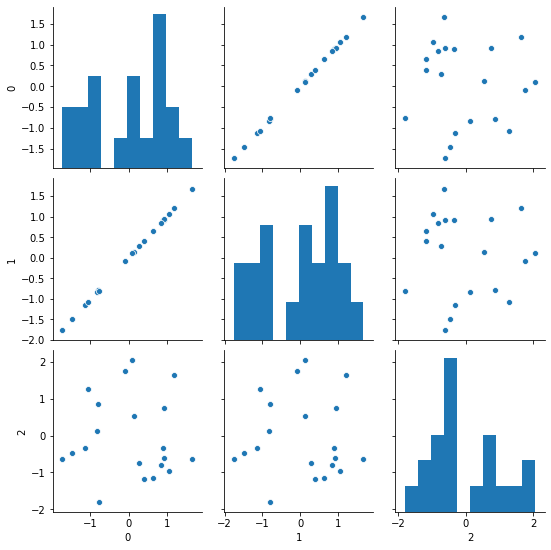

In [8]:
df_new=pd.DataFrame(X_new)
sns.pairplot(df_new)
plt.show()

Zamiast zerować wyrazy w macierzy  $S$ , można otrzymać to samo inaczej:

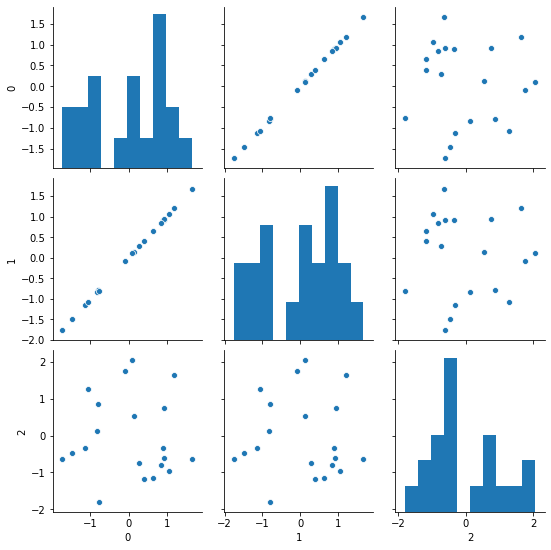

In [9]:
X_new = np.dot(np.dot(U[:,:2],S[:2,:2]),V[:2,:])

df_new=pd.DataFrame(X_new)
sns.pairplot(df_new)
plt.show()

# Zad 
Proszę wykonać powyższe zadania za pomocą funkcji 

```python
from sklearn.decomposition import TruncatedSVD as svd
svd_model = svd(n_components=2)
X_new = svd_model.fit_transform(X)
```

In [24]:
from sklearn.decomposition import TruncatedSVD as svd
svd_model = svd(n_components=2)
X_new = svd_model.fit_transform(X)

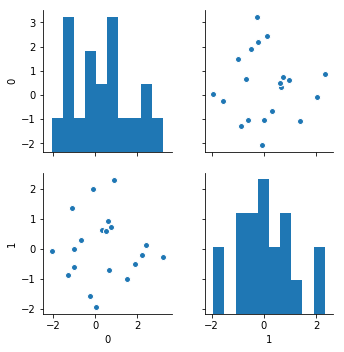

In [25]:
df_new=pd.DataFrame(X_new)
sns.pairplot(df_new)
plt.show()

# Zad

Za pomocą funkcji 

```python
from sklearn.decomposition import TruncatedSVD as svd
```

proszę wykonać redukcję wymiarowości na danych Iris

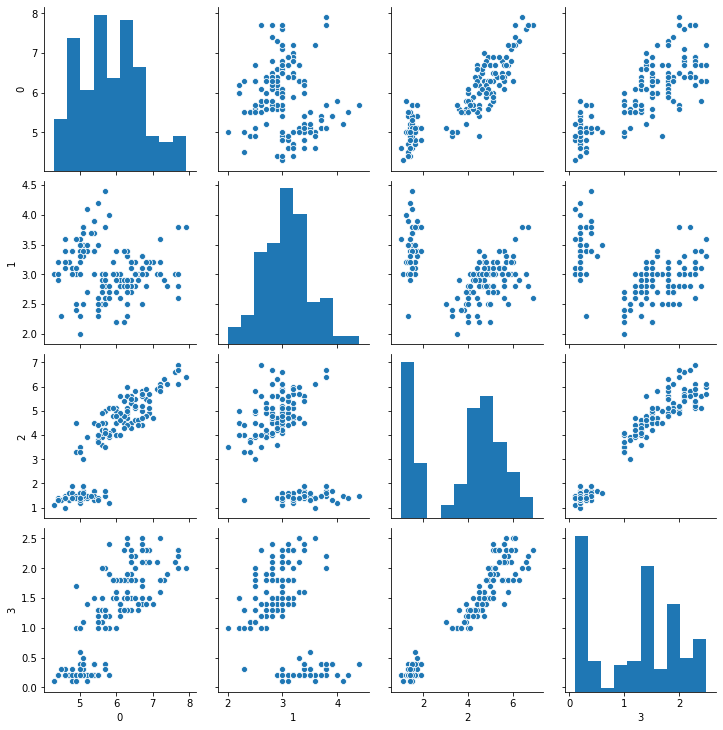

(150, 4)

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data  
y = iris.target

df=pd.DataFrame(X)
sns.pairplot(df)
plt.show()
X.shape

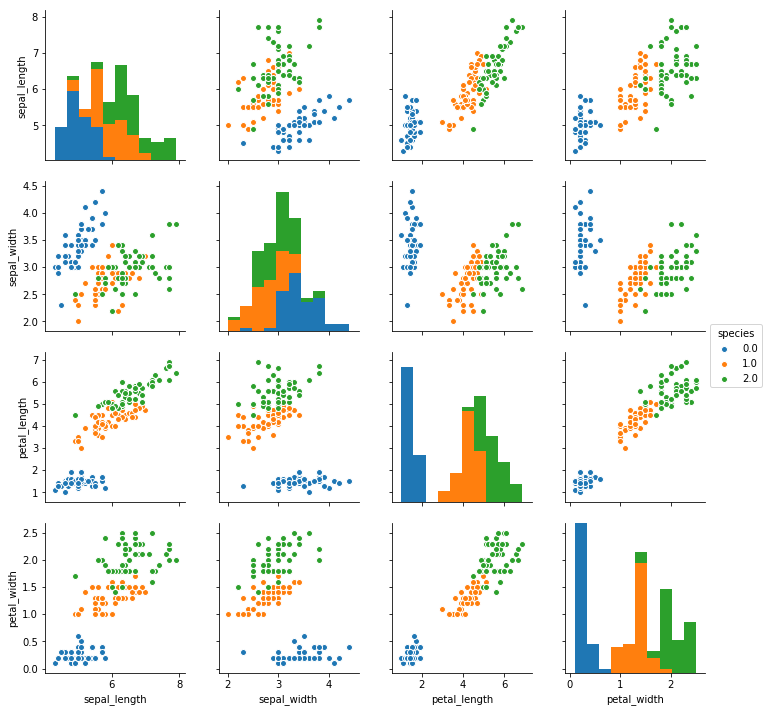

In [27]:
df=pd.DataFrame( np.hstack((X,np.reshape(y, (-1, 1)))), columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
    'species'])
df

sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue="species")
plt.show()

In [28]:
from sklearn.decomposition import TruncatedSVD as svd
